## Import libararies

In [37]:
import numpy as np
from scipy.stats import f, t
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## load data

In [4]:
dir1 = r"C:\Users\kawaw\YAMAKAWALAB\TUS_TA\experiment\experiment\0718\test.csv"
dir2 = r"C:\Users\kawaw\YAMAKAWALAB\TUS_TA\experiment\experiment\0719\test.csv"

In [6]:
df1 = pd.read_csv(filepath_or_buffer=dir1, header=None)
df2 = pd.read_csv(filepath_or_buffer=dir2, header=None)
data1 = df1.values
data2 = df2.values

(5, 2)


## Statistical test for equal variance

In [9]:
N_samples = 5
ALPHA = 0.05  # valid baseline for judging
Names = ["10Hz", "33Hz", "100Hz", "333Hz", "1000Hz"]

In [31]:
def test_equal_variance(data, alpha=ALPHA, n_samples=N_samples, names=Names):
    """statistic test for equal variance.

    Args:
        data (nd.array): data.shape = [5,2]. "10 Hz, 33 Hz, 100 Hz, 333 Hz, 1000 Hz" (mean, std)
    Return:
        bools_equalVar(nd.array): True or False meaning that 2 groups of samples have the same variance.
    """
    bools_equalVar = []

    for i in range(data.shape[0] - 1):
        for j in range(i + 1, data.shape[0]):
            # Sample data
            mean1 = data[i][0]
            std_dev1 = data[i][1]
            n1 = n_samples

            mean2 = data[j][0]
            std_dev2 = data[j][1]
            n2 = n_samples

            # Calculate sample variances
            var1 = std_dev1**2
            var2 = std_dev2**2

            # Calculate the F-test statistic
            f_stat = var1 / var2

            # Calculate degrees of freedom
            df1 = n1 - 1
            df2 = n2 - 1

            # Calculate the p-value
            p_value = 2 * min(f.cdf(f_stat, df1, df2), 1 - f.cdf(f_stat, df1, df2))

            # Interpretation
            print(f"::: Comparison between {names[i]} and {names[j]} :::")
            if p_value > alpha:
                print("Fail to reject the null hypothesis: Variances are equal")
                bools_equalVar.append(True)
            else:
                print("Reject the null hypothesis: Variances are not equal")
                bools_equalVar.append(False)

            print(f"F-test statistic: {f_stat}, p-value: {p_value}")
    bools_equalVar = np.array(bools_equalVar)
    return bools_equalVar

In [32]:
bools_equalVar1 = test_equal_variance(data1)
bools_equalVar2 = test_equal_variance(data2)

::: Comparison between 10Hz and 33Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 0.925459663566956, p-value: 0.9419594966990554
::: Comparison between 10Hz and 100Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 0.30681213378906247, p-value: 0.2789620369541344
::: Comparison between 10Hz and 333Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 0.9355877376979613, p-value: 0.95010160173119
::: Comparison between 10Hz and 1000Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 0.4559464852607709, p-value: 0.46557377789910515
::: Comparison between 33Hz and 100Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 0.3315240478515625, p-value: 0.31021013152374893
::: Comparison between 33Hz and 333Hz :::
Fail to reject the null hypothesis: Variances are equal
F-test statistic: 1.0109438309736474, p-value: 0.9918368757263498
::: Comparison b

In [33]:
print(bools_equalVar1)
print(bools_equalVar2)

[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True False  True  True  True  True  True]


## T-test

In [38]:
ALPHA = 0.05  # valid baseline for judging

In [41]:
def test_significant_test(data, alpha=ALPHA, n_samples=N_samples, names=Names):
    """statistic test for significant test with t-test.

    Args:
        data (nd.array): data.shape = [5,2]. "10 Hz, 33 Hz, 100 Hz, 333 Hz, 1000 Hz" (mean, std)
    Return:
        bools_difference(nd.array): 0: no significant difference. 1: significant difference.
    """
    bools_difference = np.zeros((data.shape[0], data.shape[0]))

    for i in range(data.shape[0] - 1):
        for j in range(i + 1, data.shape[0]):
            # Sample data
            mean1 = data[i][0]
            std_dev1 = data[i][1]
            n1 = n_samples

            mean2 = data[j][0]
            std_dev2 = data[j][1]
            n2 = n_samples

            # Equal variances (Pooled t-test)
            # Calculate pooled standard deviation
            sp = np.sqrt(
                ((n1 - 1) * std_dev1**2 + (n2 - 1) * std_dev2**2) / (n1 + n2 - 2)
            )

            # Calculate t-statistic
            t_stat_pooled = (mean1 - mean2) / (sp * np.sqrt(1 / n1 + 1 / n2))

            # Degrees of freedom
            df_pooled = n1 + n2 - 2

            # Calculate p-value
            p_value_pooled = 2 * (1 - t.cdf(abs(t_stat_pooled), df_pooled))

            print(
                f"Pooled t-test statistic: {t_stat_pooled}, p-value: {p_value_pooled}"
            )

            # Unequal variances (Welch's t-test)
            # Calculate t-statistic
            t_stat_welch = (mean1 - mean2) / np.sqrt(
                std_dev1**2 / n1 + std_dev2**2 / n2
            )

            # Degrees of freedom using Welch-Satterthwaite equation
            df_welch = ((std_dev1**2 / n1 + std_dev2**2 / n2) ** 2) / (
                (std_dev1**2 / n1) ** 2 / (n1 - 1) + (std_dev2**2 / n2) ** 2 / (n2 - 1)
            )

            # Calculate p-value
            p_value_welch = 2 * (1 - t.cdf(abs(t_stat_welch), df_welch))

            print(f"Welch's t-test statistic: {t_stat_welch}, p-value: {p_value_welch}")

            # Interpretation
            # if p_value_pooled > alpha:
            #     print("Fail to reject the null hypothesis (equal variances): Means are not significantly different")
            # else:
            #     print("Reject the null hypothesis (equal variances): Means are significantly different")
            #     bools_difference[i][j] = 1
            #     bools_difference[j][i] = 1

            if p_value_welch > alpha:
                print(
                    "Fail to reject the null hypothesis (unequal variances): Means are not significantly different"
                )
            else:
                print(
                    "Reject the null hypothesis (unequal variances): Means are significantly different"
                )
                bools_difference[i][j] = 1
                bools_difference[j][i] = 1

    # show data
    # Define the colormap
    cmap = mcolors.ListedColormap(["orange", "blue"])

    # Create the heatmap
    fig, ax = plt.subplots()
    cax = ax.matshow(bools_difference, cmap=cmap)

    # Add color bar for reference
    cbar = plt.colorbar(cax, ticks=[0, 1])
    cbar.ax.set_yticklabels(["0", "1"])

    # Add labels to each cell
    for i in range(data.shape[0]):
        for j in range(data.shape[0]):
            c = bools_difference[j, i]
            ax.text(i, j, str(c), va="center", ha="center")

    # Set x and y labels
    ax.set_xticks(np.arange(data.shape[0]))
    ax.set_yticks(np.arange(data.shape[0]))
    ax.set_xticklabels([f"{name}" for name in names])
    ax.set_yticklabels([f"{name}" for name in names])

    # Set labels to axes
    plt.xlabel("Frequecy")
    plt.ylabel("Frequency")

    # Show the plot
    plt.show()

    return bools_difference

Pooled t-test statistic: 2.973645615389361, p-value: 0.017771947324513926
Welch's t-test statistic: 2.973645615389361, p-value: 0.017801824527016175
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 2.5367434135104023, p-value: 0.03488720580193827
Welch's t-test statistic: 2.536743413510402, p-value: 0.04277954467956446
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 4.385353347279948, p-value: 0.0023320072417578608
Welch's t-test statistic: 4.385353347279948, p-value: 0.0023382195632184466
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 2.929753521632745, p-value: 0.01900531694506724
Welch's t-test statistic: 2.929753521632745, p-value: 0.0219620361283841
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 0.4541734890537842, p-value: 0.6617726806409736
Welch's t-tes

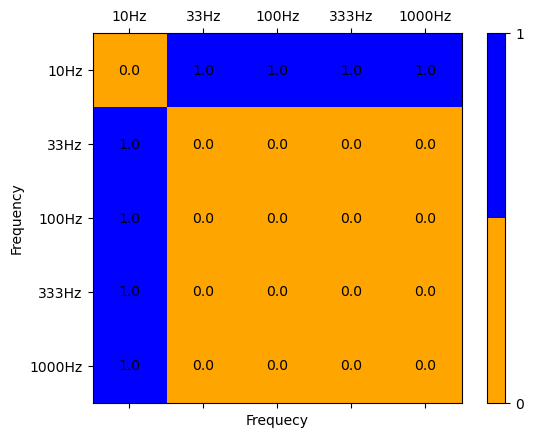

Pooled t-test statistic: 1.8536075963478535, p-value: 0.10091629556056403
Welch's t-test statistic: 1.853607596347854, p-value: 0.11289700245701972
Fail to reject the null hypothesis (equal variances): Means are not significantly different
Pooled t-test statistic: 1.8631833727368892, p-value: 0.09944316849344137
Welch's t-test statistic: 1.8631833727368894, p-value: 0.10138501180734316
Fail to reject the null hypothesis (equal variances): Means are not significantly different
Pooled t-test statistic: 3.0421876697745267, p-value: 0.01600996348061612
Welch's t-test statistic: 3.0421876697745267, p-value: 0.01620292401690482
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 3.665030383308021, p-value: 0.006354892359566877
Welch's t-test statistic: 3.665030383308021, p-value: 0.007151617079505845
Reject the null hypothesis (equal variances): Means are significantly different
Pooled t-test statistic: 0.6648017174196653, p-value: 0.52487

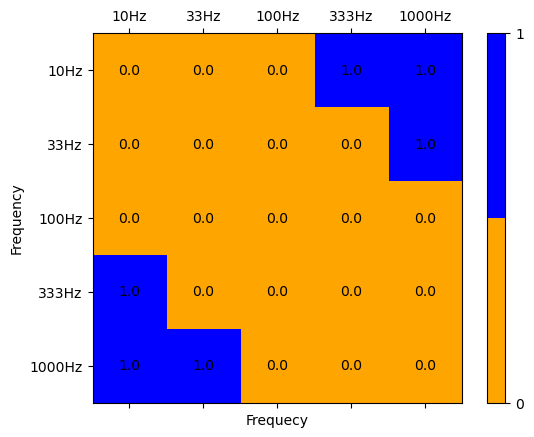

In [42]:
bools_difference1 = test_significant_test(data1)
bools_difference2 = test_significant_test(data2)